In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import sys
import getpass
from functions import *
np.set_printoptions(precision=2)
pd.set_option('precision', 2)

## Reading in dataframe

In [5]:
PATH = '/Google Drive/Jonathan Sarah Ido folder/data/CCK/'
def get_path(path = PATH):
    if os.name == 'posix':
        return os.environ['HOME']+path #'/Google Drive/Jonathan Sarah Ido folder/data/CCK/'
    elif os.name == 'nt':
        return os.environ['USERPROFILE']+ path.replace('/','\\') #'\\Google Drive\Jonathan Sarah Ido folder\data\CCK\\'
    else:
        raise Exception('OS not recongnized. I\'m confused.')
gitpath = '/Documents/git/Phet-log-analyzer/cck/raw_data_parsing_check/'
df = pd.read_csv(get_path(path = gitpath) + 'phet_cck_user_actions+sophistication_WITHPAUSE_more_circuit_info.txt',index_col=False)
# dfx = pd.read_csv('C:\Users\Sarah\Documents\git\Phet-log-analyzer\cck\\raw_data_parsing_check\phet_cck_user_actions+sophistication_WITHPAUSE_more_circuit_info.txt',index_col=False)
df["student"] = df["student"].astype('category')
df["Family"]=df["Family"].str.capitalize()

df_scores = pd.read_csv(data_path + 'MATCHING_phet_cck_user_data_anonymized.txt')
df_scores["student"] = df_scores["student"].astype('category')

## Getting a sense of the data

In [6]:
actions = [np.mean([  df[ (df['student']==student) & 
            (df['Activity']=='a'+str(activity)) ].shape[0] for student in set(df['student'])  ]) for activity in [1,2,3]]
'''There are {0} students with an average number of actions of: {1:.2f} activity 1, {2:.2f} for activity 2, {3:.2f} for activity 3'''.format(len(set(df['student'])), actions[0],actions[1],actions[2])

'There are 96 students with an average number of actions of: 0.00 activity 1, 324.42 for activity 2, 0.00 for activity 3'

In [7]:
'''There are {0} different families of actions {1}'''.format(len(set(df['Family'])),set(df['Family']))

"There are 15 different families of actions set(['Test_basic_not_noncontactammeter', 'Pause', 'Test_basic_not_voltmeter', 'Test_simple_not_voltmeter', 'Test_complex_default', 'Test_simple_not_noncontactammeter', 'Test_other_default', 'Construct', 'Test_complex_not', 'Test_basic_default_voltmeter', 'Test_other_not', 'Test_basic_default_noncontactammeter', 'Interface', 'Test_simple_default_noncontactammeter', 'Test_simple_default_voltmeter'])"

In [8]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible actions grouped by family:\n"
actionTypes = {}
for family in set(df2['Family']):
    actionTypes[family] = list(set(df2[df2['Family']==family]['Action']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(df2[df2['Family']==family]['Action']))))

The following are the possible actions grouped by family:

Test_basic_not_noncontactammeter:	 startMeasure, traceMeasure
Pause:	 pause
Test_basic_not_voltmeter:	 startMeasure
Test_simple_not_voltmeter:	 startMeasure
Test_complex_default:	 startMeasure, traceMeasure
Test_simple_not_noncontactammeter:	 startMeasure, traceMeasure
Test_other_default:	 startMeasure, traceMeasure
Construct:	 reset, moreVoltsOption, join, reverse, changeVoltage, switch, remove, changeResistance, sliderEndDrag, add, split, organizeWorkspace, joinX
Test_complex_not:	 startMeasure, traceMeasure
Test_basic_default_voltmeter:	 startMeasure
Test_other_not:	 startMeasure, traceMeasure
Test_basic_default_noncontactammeter:	 startMeasure, traceMeasure
Interface:	 deiconified, help, iconified, exitSim, enableComponent, disableComponent, view
Test_simple_default_noncontactammeter:	 startMeasure, traceMeasure
Test_simple_default_voltmeter:	 startMeasure


In [9]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible outcomes grouped by family:\n"
outcomeTypes = {}
for family in set(df2['Family']):
    outcomeTypes[family] = list(set(df2[df2['Family']==family]['Outcome']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(df2[df2['Family']==family]['Outcome']))))

The following are the possible outcomes grouped by family:

Test_basic_not_noncontactammeter:	 deliberate_measure, None
Pause:	 pause
Test_basic_not_voltmeter:	 deliberate_measure
Test_simple_not_voltmeter:	 deliberate_measure
Test_complex_default:	 deliberate_measure, None
Test_simple_not_noncontactammeter:	 deliberate_measure, None
Test_other_default:	 deliberate_measure, None
Construct:	 current_change, None, reading_updated, fire_started, light_intensity
Test_complex_not:	 deliberate_measure, None
Test_basic_default_voltmeter:	 deliberate_measure
Test_other_not:	 deliberate_measure, None, light_intensity
Test_basic_default_noncontactammeter:	 deliberate_measure, None
Interface:	 None
Test_simple_default_noncontactammeter:	 deliberate_measure, None
Test_simple_default_voltmeter:	 deliberate_measure


In [12]:
df.head()

,Activity,student,Time Stamp,Family,Action,Component,Outcome,#circuits,#circuits_w_battery,#loops,...,current_is_circuit,current_#loops,current_#components,current_#battery,current_#circuitSwitch,current_#grabBagResistor,current_#lightBulb,current_#resistor,current_#seriesAmmeter,non_default_resistor_values
0,a2,10009106,1363981168331,Construct,add,wire,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a2,10009106,1363981175425,Construct,add,battery,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a2,10009106,1363981178425,Construct,add,resistor,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a2,10009106,1363981178426,Pause,pause,pause,pause,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,a2,10009106,1363981193503,Interface,view,zoom,None,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_scores.head()

,Wave,scaffolding,how many PhETs in the past?,how comfortable with phets?,p100,used this circuit sim before?,COMPLETEDNESS,PRIORKNOWLEDGE,COMPLEXITY,DIAGRAMS,...,z post t2,T0_PoCC,T1_PoCC,T2_PoCC,Avg_Mast_Or,Perceived Value,Clustergroups,fourgroups,student,Anon Student Id
0,March,scaff,2,2,0,0,1,1,1,0,...,0.33,2.67,2.78,2.67,4.0,3.50,attitude,scaffolded_attitude,1075123,1920143974
1,March,scaff,2,3,0,0,1,0,1,1,...,-0.12,2.44,3.11,3.33,4.5,3.25,attitude,scaffolded_attitude,3591123,-714775387
2,March,not,2,3,0,0,1,1,1,2,...,-0.72,2.22,2.78,2.44,3.5,3.00,attitude,notscaffolded_attitude,3932129,1194576952
3,March,scaff,2,3,1,1,1,1,1,2,...,-1.18,3.00,3.22,3.11,4.5,3.00,attitude,scaffolded_attitude,4762120,-450686147
4,July,not,1,2,1,0,1,0,1,0,...,-0.18,2.67,3.22,2.78,5.0,3.00,knowledge,notscaffolded_knowledge,4936123,-901793583


We check that the students we have scores for we also have log data for.

In [14]:
set(df['student']) - set(df_scores['student'])

set()

## Descriptors
### How much is each action done? How does it depend on activity and condition?

In [15]:
"There are {} high knowledge students and {} high attitude students in the clusters".format(len(get_students("Clustergroups","knowledge")),len(get_students("Clustergroups","attitude")))

'There are 30 high knowledge students and 66 high attitude students in the clusters'

(0, 30)

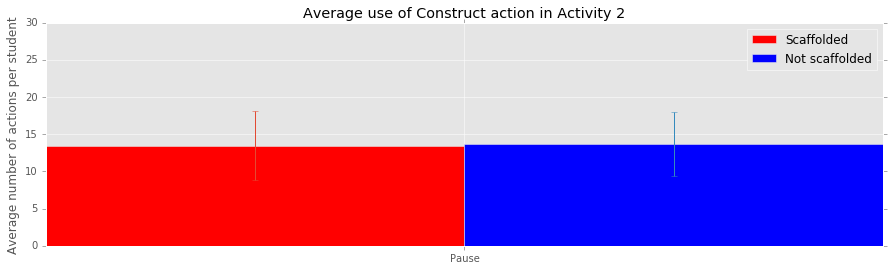

In [26]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,4))
df_copy = df[df["Family"]=='Pause'].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of Construct action in Activity 2')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 30])

(0, 80)

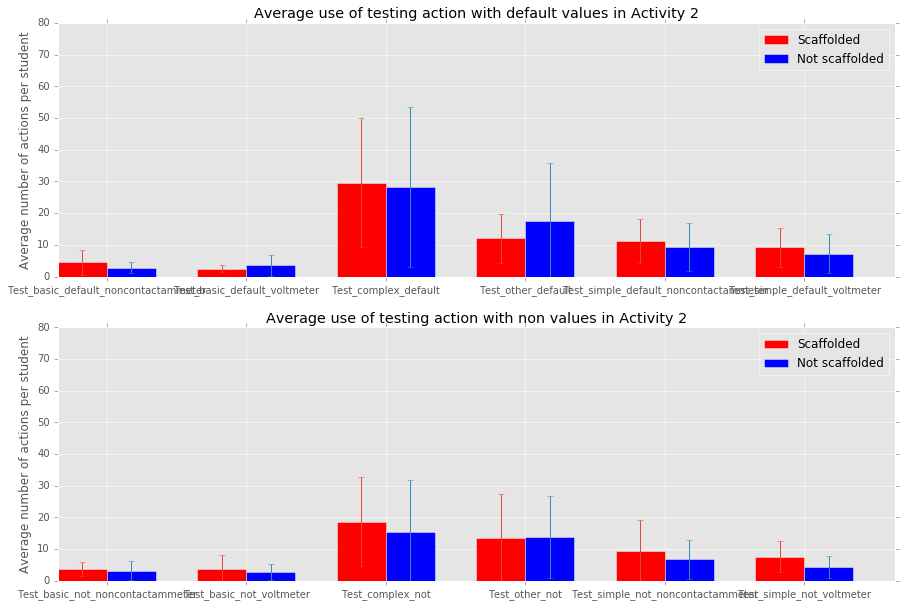

In [16]:
default_categories = ['Test_complex_default','Test_other_default','Test_basic_default_voltmeter','Test_basic_default_noncontactammeter','Test_simple_default_noncontactammeter','Test_simple_default_voltmeter']
not_categories = ['Test_basic_not_noncontactammeter','Test_basic_not_voltmeter','Test_simple_not_voltmeter','Test_simple_not_noncontactammeter','Test_complex_not','Test_other_not']
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

ax = axs[0]
df_copy = df[df["Family"].isin(default_categories)].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with default values in Activity 2')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 80])

ax = axs[1]
df_copy = df[df["Family"].isin(not_categories)].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with non values in Activity 2')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 80])

### How much is each action done? How does it depend on activity and student cluster?

(0, 80)

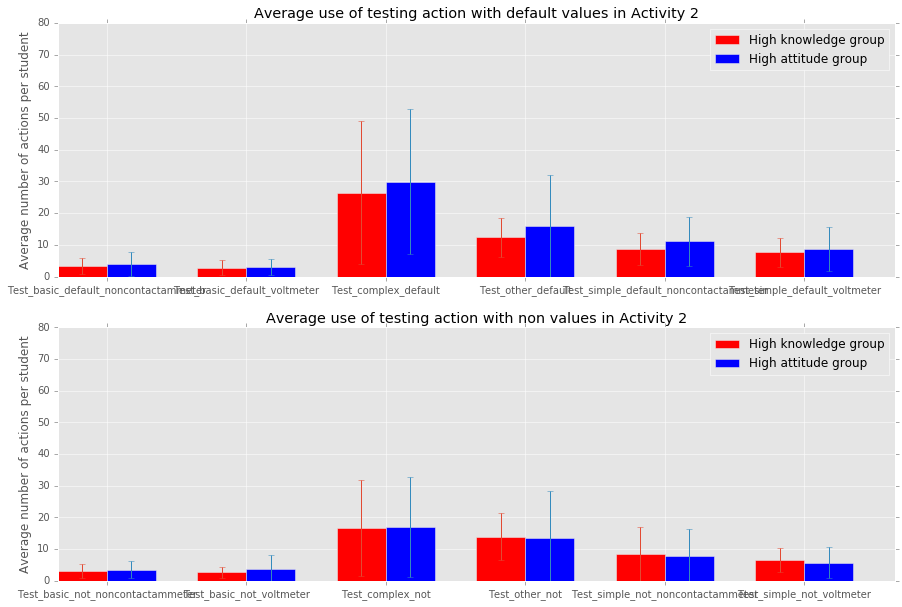

In [27]:
default_categories = ['Test_complex_default','Test_other_default','Test_basic_default_voltmeter','Test_basic_default_noncontactammeter','Test_simple_default_noncontactammeter','Test_simple_default_voltmeter']
not_categories = ['Test_basic_not_noncontactammeter','Test_basic_not_voltmeter','Test_simple_not_voltmeter','Test_simple_not_noncontactammeter','Test_complex_not','Test_other_not']
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

ax = axs[0]
df_copy = df[df["Family"].isin(default_categories)].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("Clustergroups",'knowledge')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("Clustergroups",'attitude')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with default values in Activity 2')
ax.legend((rec1, rec2), ('High knowledge group', 'High attitude group'))
ax.set_ylim([0, 80])

ax = axs[1]
df_copy = df[df["Family"].isin(not_categories)].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("Clustergroups",'knowledge')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("Clustergroups",'attitude')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with non values in Activity 2')
ax.legend((rec1, rec2), ('High knowledge group', 'High attitude group'))
ax.set_ylim([0, 80])

### Circuit complexity analysis

In [33]:
# fig, axs = plt.subplots(1,3, figsize=(18,5))
# df2 = df[(df['Activity']=="a2")]
# table1 = pd.pivot_table(df2, values='#circuits',columns=['student'], aggfunc=np.mean); table1.hist(ax=axs[0])
# axs[0].set_title("Number of circuits")
# table2 = pd.pivot_table(df2, values='#loops',columns=['student'], aggfunc=np.mean); table2.hist(ax=axs[1])
# axs[1].set_title("Number of loops")
# table3 = pd.pivot_table(df2, values='#components',columns=['student'], aggfunc=np.mean); table3.hist(ax=axs[2])
# axs[2].set_title("Number of components")

In [30]:
# from pandas.tools.plotting import parallel_coordinates
# plt.subplots(1,1, figsize=(18,6))
# df2= df.dropna()
# parallel_coordinates(df2[["Activity","#circuits","#loops","#components","#battery","#circuitSwitch","#grabBagResistor","#lightBulb","#resistor"]],"Activity")

Next let's look at how many different circuits the students make, and their complexity, per activity.

In [34]:
# fig, axs = plt.subplots(1,2, figsize=(18,5))
# bins = np.linspace(0, 25, 25)
# ax=axs[0]
# df2 = df[df['Activity']=="a1"]
# students = get_students("scaffolding",'scaff')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Scaffolded", normed=True)
# students = get_students("scaffolding",'not')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Not scaffolded", normed=True)
# ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
# ax.set_title('Histogram of number of unique circuits in Activity 1')

# ax=axs[1]
# df2 = df[df['Activity']=="a2"]
# students = get_students("scaffolding",'scaff')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Scaffolded", normed=True)
# students = get_students("scaffolding",'not')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Not scaffolded", normed=True)
# ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
# ax.set_title('Histogram of number of unique circuits in Activity 2')

In [35]:
# fig, axs = plt.subplots(1,2, figsize=(18,5))
# bins = np.linspace(0, 25, 25)
# ax=axs[0]
# df2 = df[df['Activity']=="a1"]
# students = get_students("Clustergroups",'knowledge')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior knowledge", normed = True)
# students = get_students("Clustergroups",'attitude')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior attitude", normed = True)
# ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
# ax.set_title('Histogram of number of unique circuits in Activity 1')

# ax=axs[1]
# df2 = df[df['Activity']=="a2"]
# students = get_students("Clustergroups",'knowledge')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior knowledge", normed = True)
# students = get_students("Clustergroups",'attitude')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior attitude", normed = True)
# ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
# ax.set_title('Histogram of number of unique circuits in Activity 2')